# Reinforced learning, työllistyminen ja Suomen sosiaaliturva

Tässä tehdään laskelmat artikkelia varten. Käytössä on gym-ympäristö _unemployment-v1_ , johon on toteutettu yksityiskohtaisesti sosiaaliturvaa eri tiloissa.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

In [2]:
#import sys
#print(sys.path)
#sys.path.append('/usr/local/python3.7/site-packages')

Then load all modules and set parameters for simulations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.15 valittaa paljon)
# ei taida toimia piilottaminen
import warnings
warnings.filterwarnings('ignore')


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


In [2]:
# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=100_000 # size of the population to be simulated
size1=10_000_000 # number of timesteps in phase 1 training (callback not used)
size2=100_000_000 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=20_000_000 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=8 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=True # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include externally given, random state-transitions (parental leaves, disability, lay-offs) 
pinkslip=True # include lay-offs at 5 percent level each year
rlmodel='leaky_acktr' #'acktr' # use ACKTR algorithm # leaky_acktr?
twostage=False # ajataan kahdessa vaiheessa vai ei
if mortality:
    perusmalli_start='best/v2_malli_base_dev'
    perusmalli='best/v2_malli_base_dev'
    perusresults='results/v2_malli_base_dev_stoch'
    prefmalli='best/v2_malli_perus_prefnoise'
    prefresults='results/v2_perus_results_prefnoise'
else:
    perusmalli_start='best/v2_malli_baseline2_nomort'
    perusmalli='best/v2_malli_base_nomort'
    perusresults='results/v2_malli_base_nomort'
    baseline_results='results/v2_malli_baseline_nomort'
    prefmalli='best/v2_malli_perus_prefnoise_nomort'
    prefresults='results/v2_perus_results_prefnoise_nomort'
    
tva_savefile='results/v2_tvaresults'
    
debug=False # jos True, niin ajetaan vain yhdellä prosessilla. Nopeampi debugata.
plotdebug=False # tulostetaanko rivi riviltä mitä tapahtuu

year=2019

# TOE-vertailu

Verrataan perusmallia porrastettuun TOE-malliin

In [3]:
toemalli='best/v2_toemalli'
toeresults='results/v2_toemalli'

In [4]:
cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug,year=year,
              porrasta_toe=True)
cc1.run_results(debug=debug,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,
                save=toemalli,plot=False,cont=True,start_from=perusmalli_start,results=toeresults,
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage,
                learning_rate=0.25,learning_schedule='linear',log_interval=100)

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 18
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_kesto500 500
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True
perustulo False

sigma_reduction True
plotdebug False

additional_tyel_premium 0.0
scale_tyel_accrual False

version 2
train...
phase 1
No mortality included
No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 18
max_age 70
min_retirementage 63.5No mortality includedParameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 18
max_age 70
min_retirementage 63.5


No mortality includedmax_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_kesto500 500
ansiopvraha_toe 0





training...






---------------------------------
| explained_variance | 0.999    |
| fps                | 402      |
| nupdates           | 1        |
| policy_entropy     | 1.09     |
| policy_loss        | 0.0178   |
| total_timesteps    | 1680     |
| value_loss         | 0.015    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 1596     |
| nupdates           | 100      |
| policy_entropy     | 1.05     |
| policy_loss        | 0.00437  |
| total_timesteps    | 168000   |
| value_loss         | 0.0134   |
---------------------------------


Process ForkProcess-6:
Process ForkProcess-7:
Process ForkProcess-8:
Process ForkProcess-5:
Process ForkProcess-3:
Process ForkProcess-2:
Process ForkProcess-4:
Process ForkProcess-1:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/antti/opt/anaconda3/envs/py37/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/Users/antti/opt/anaconda3/envs/py37/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/Users/antti/opt/anaconda3/envs/py37/lib/python3.7/site-packages/stable_baselines/common/vec_env/subproc_vec_env.py", line 16, in _worker
    cmd, data = remote.recv()
Traceback (most recent call last):
  File "/Users/antti/opt/anaconda3/envs/py37/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/antti/opt/anaconda3/envs/py37/lib/python3.7/mu

Traceback (most recent call last):
  File "/Users/antti/opt/anaconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-2e1bfaf6a3a9>", line 8, in <module>
    learning_rate=0.25,learning_schedule='linear',log_interval=100)
  File "/Users/antti/Github/lifecycle-rl/lifecycle_rl/lifecycle.py", line 851, in run_results
    learning_schedule=learning_schedule,vf=vf,arch=arch,gae_lambda=gae_lambda)
  File "/Users/antti/Github/lifecycle-rl/lifecycle_rl/lifecycle.py", line 888, in run_protocol
    max_grad_norm=max_grad_norm,learning_rate=learning_rate,learning_schedule=learning_schedule)
  File "/Users/antti/Github/lifecycle-rl/lifecycle_rl/lifecycle.py", line 595, in train
    model.learn(total_timesteps=steps, log_interval=log_interval)
  File "/Users/antti/opt/anaconda3/envs/py37/lib/python3.7/site-packages/stable_baselines/acktr/acktr.py", line 343, in learn
    ro

TypeError: object of type 'NoneType' has no len()

In [7]:
cc0=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug,year=year,
              porrasta_toe=False)
cc0.load_sim(load=perusresults)

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 18
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_kesto500 500
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True
perustulo False

sigma_reduction True
plotdebug False

additional_tyel_premium 0.0
scale_tyel_accrual False

version 2
n_pop 20000


No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 18
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_kesto500 500
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True
perustulo False

sigma_reduction True
plotdebug False

additional_tyel_premium 0.0
scale_tyel_accrual False

version 2
n_pop 100000
Rahavirrat skaalattuna väestötasolle
+----------------------+-----------------------+----------------------+--------------------+
|                      |         Toe-porrastus |             Baseline |                ero |
|----------------------+-----------------------+----------------------+--------------------|
| tyotulosumma         |  92,320,766,676.61    | 91,331,262,899.25    |  989,503,777.36    |
| etuusmeno            |  42,483,436,690.03    | 42,956,429,162.80    | -

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


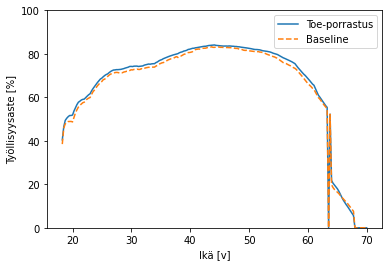

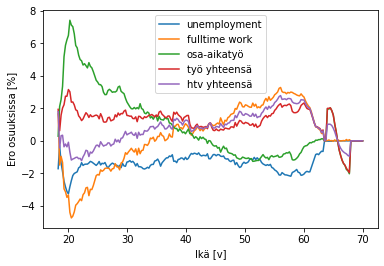

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


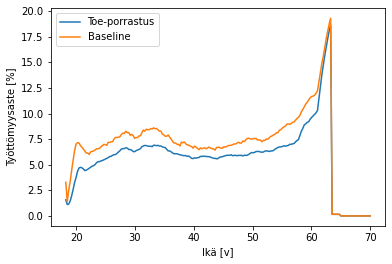

No handles with labels found to put in legend.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


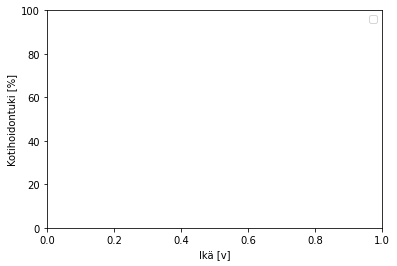

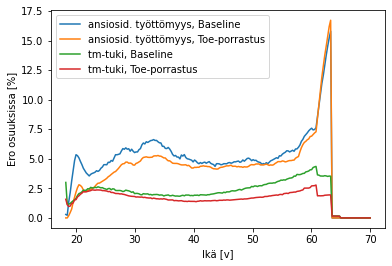

Työllisyysvaikutus 21-64-vuotiaisiin noin 29295 htv ja 41593 työllistä
- kokoaikaisiin 21-64-vuotiailla noin 16996 työllistä (1980938 vs 1963942)
- osa-aikaisiin 21-64-vuotiailla noin 24596 työllistä (271635 vs 247039)
Työllisiä 2116756 vs 2087461 htv
Työllisyysastevaikutus 21-64-vuotiailla noin 1.40 prosenttia (75.73 vs 74.33)
- kokoaikaisiin 21-64-vuotiailla noin 0.57 prosenttia (66.59 vs 66.02)
- osa-aikaisiin 21-64-vuotiailla noin 0.83 prosenttia (9.13 vs 8.30)
epävarmuus työllisyysasteissa 0.0062, hajonta 0.0758


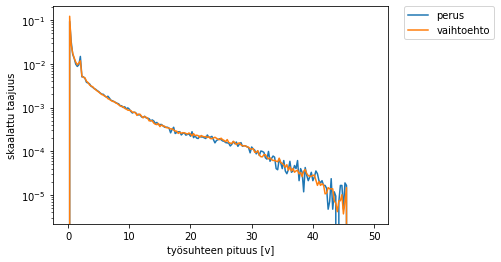

Jakauma ansiosidonnainen+tmtuki+putki, no max age
Toe-porrastus keskikesto 0.8658239130578578 v Baseline keskikesto 1.1045785260565206 v
Skaalaamaton Toe-porrastus lkm 302362 v Baseline lkm 61712 v
Skaalaamaton Toe-porrastus työtpäiviä yht 261792.25 v Baseline työtpäiviä yht 68165.75 v


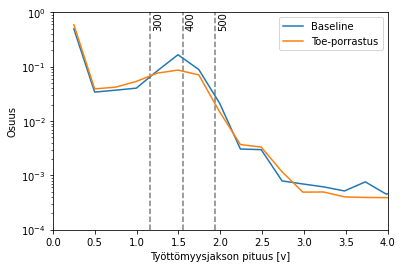

Toe-porrastus keskikesto 0.8658239130578578 v Baseline keskikesto 1.1045785260565206 v
Skaalaamaton Toe-porrastus lkm 302362 v Baseline lkm 61712 v
Skaalaamaton Toe-porrastus työtpäiviä yht 261792.25 v Baseline työtpäiviä yht 68165.75 v


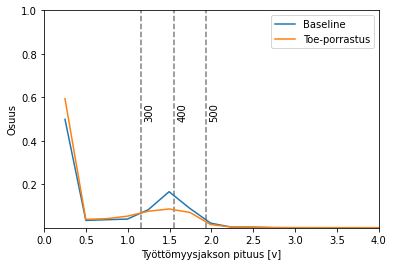

Toe-porrastus keskikesto 0.8658239130578578 v Baseline keskikesto 1.1045785260565206 v
Skaalaamaton Toe-porrastus lkm 302362 v Baseline lkm 61712 v
Skaalaamaton Toe-porrastus työtpäiviä yht 261792.25 v Baseline työtpäiviä yht 68165.75 v


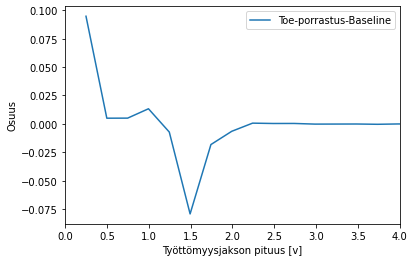

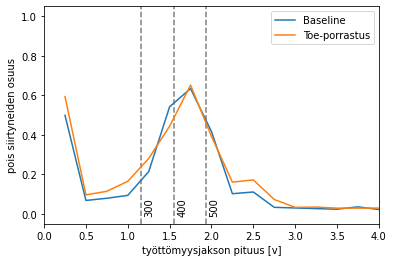

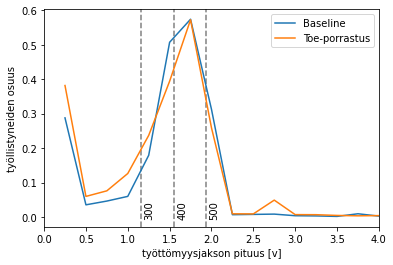

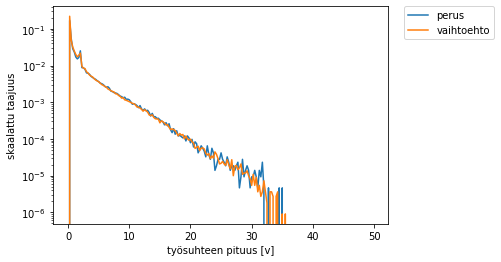

Jakauma ansiosidonnainen+tmtuki+putki, max age 54
Toe-porrastus keskikesto 0.6995583024833569 v Baseline keskikesto 0.8480230883040025 v
Skaalaamaton Toe-porrastus lkm 251756 v Baseline lkm 51368 v
Skaalaamaton Toe-porrastus työtpäiviä yht 176118.0 v Baseline työtpäiviä yht 43561.25 v


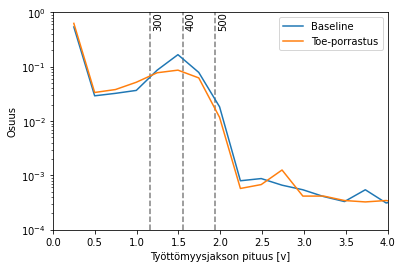

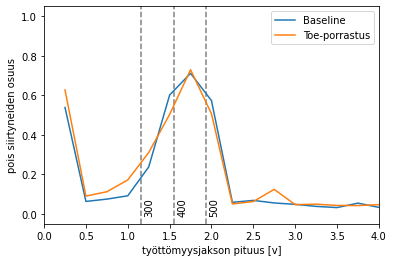

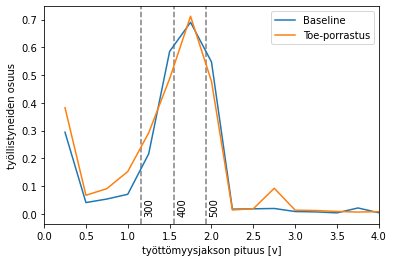

Baseline
+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     0.56 |      0.31 |       0.12 |      0.01 |        0.00 |
| 30-39 |     0.47 |      0.32 |       0.19 |      0.03 |        0.00 |
| 40-49 |     0.42 |      0.32 |       0.22 |      0.04 |        0.00 |
| 50-59 |     0.38 |      0.30 |       0.24 |      0.08 |        0.00 |
| 60-65 |     0.28 |      0.21 |       0.19 |      0.14 |        0.19 |
+-------+----------+-----------+------------+-----------+-------------+
Toe-porrastus
+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     0.49 |      0.33 |       0.18 |      0.01 |        0.00 |
| 30-39 |     0.42 |      0.31 |       0.

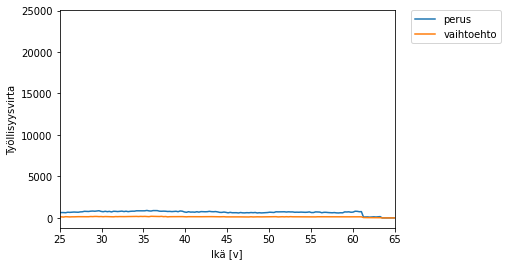

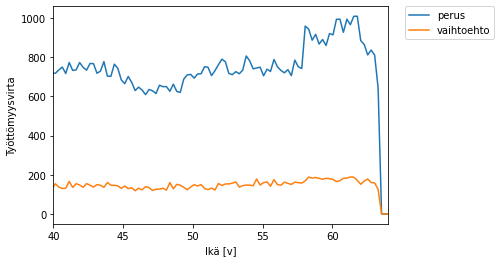

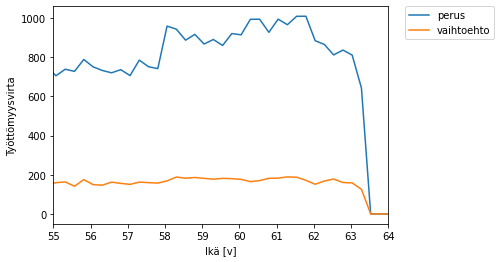

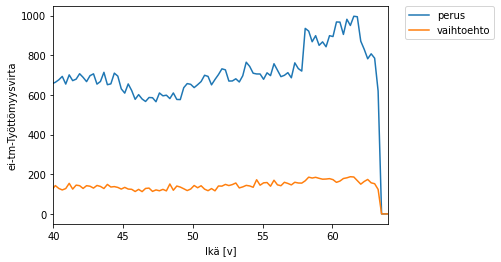

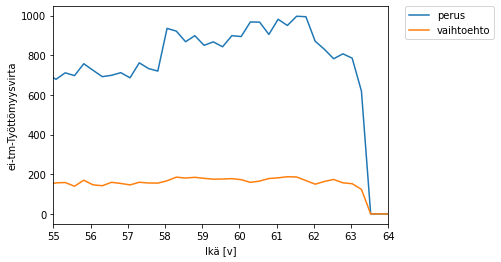

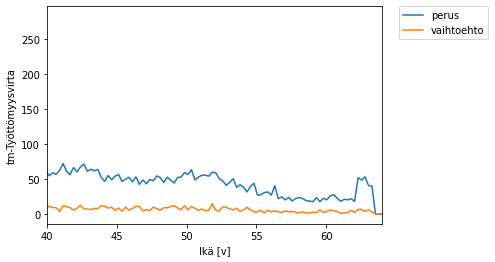

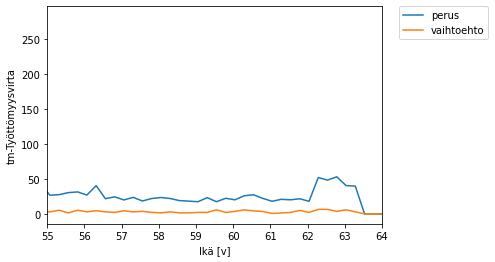

In [8]:
cc3=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug,year=year,
              porrasta_toe=True)
cc3.load_sim(load=toeresults)
cc3.compare_with(cc0,label1='Toe-porrastus',label2='Baseline',figname='perustulo_no_pink')

Ave reward 229.54297728211745
Rahavirrat skaalattuna väestötasolle
+----------------------+-----------------------+----------------------+----------------------+
|                      |                   e/v |              toteuma |                  ero |
|----------------------+-----------------------+----------------------+----------------------|
| tyotulosumma         |  92,320,766,676.61    | 89,134,200,000.00    |  3,186,566,676.61    |
| etuusmeno            |  42,483,436,690.03    | 39,279,916,450.00    |  3,203,520,240.03    |
| verot+maksut         |  34,673,138,153.21    | 34,025,549,800.00    |    647,588,353.21    |
| muut tulot           |   7,810,298,536.82    |  5,254,366,650.00    |  2,555,931,886.82    |
| valtionvero          |   4,017,035,053.08    |  5,542,000,000.00    | -1,524,964,946.92    |
| kunnallisvero        |  20,347,473,215.89    | 18,991,000,000.00    |  1,356,473,215.89    |
| ptel                 |   6,241,873,813.58    |  5,560,000,000.00    |    681

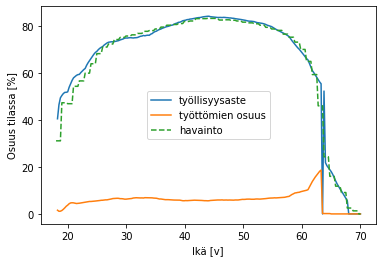

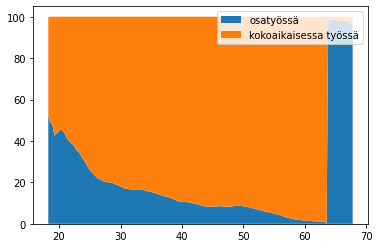

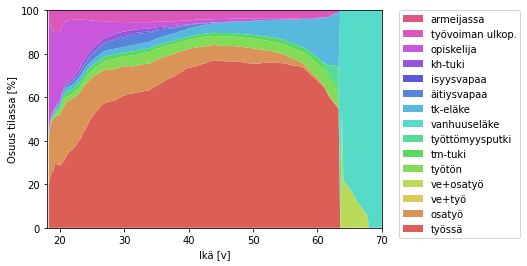

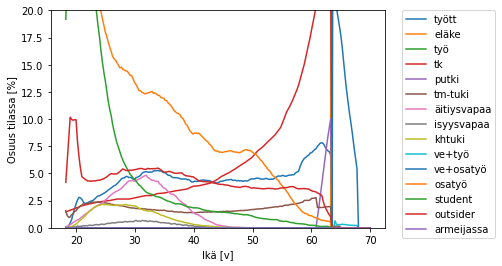

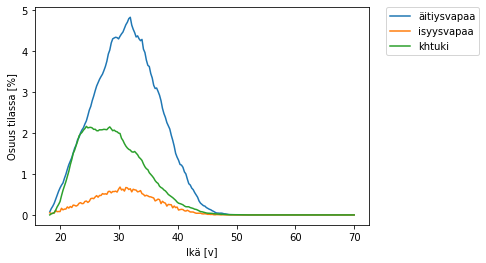

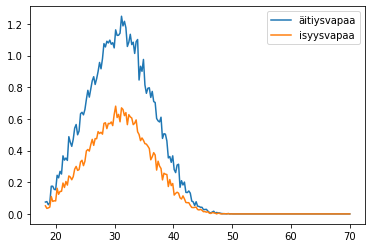

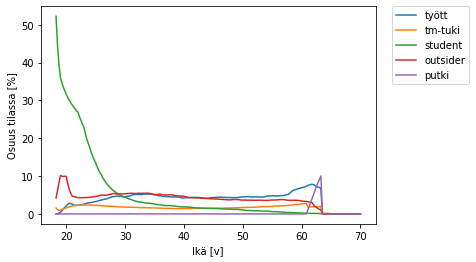

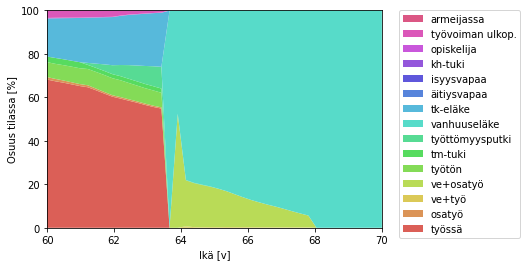

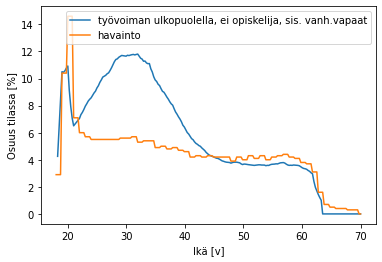

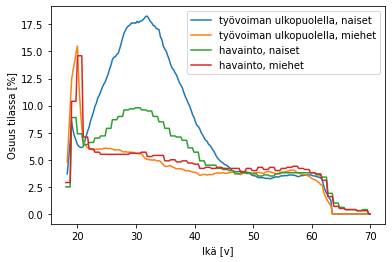

Keskikestot käytettyjen ansiosidonnaisten päivärahojen mukaan
+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     0.56 |      0.31 |       0.12 |      0.01 |        0.00 |
| 30-39 |     0.47 |      0.32 |       0.19 |      0.03 |        0.00 |
| 40-49 |     0.42 |      0.32 |       0.22 |      0.04 |        0.00 |
| 50-59 |     0.38 |      0.30 |       0.24 |      0.08 |        0.00 |
| 60-65 |     0.28 |      0.21 |       0.19 |      0.14 |        0.19 |
+-------+----------+-----------+------------+-----------+-------------+
Keskikestot viimeisimmän työttömyysjakson mukaan
+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     0.84 |     

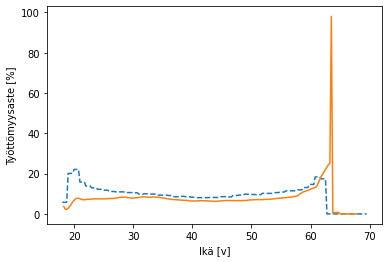

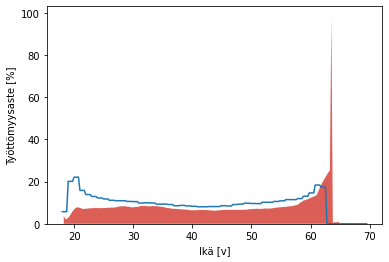

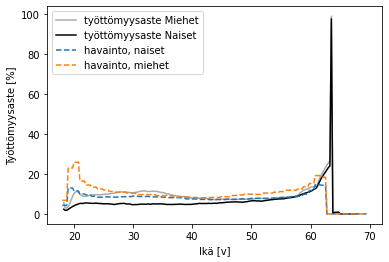

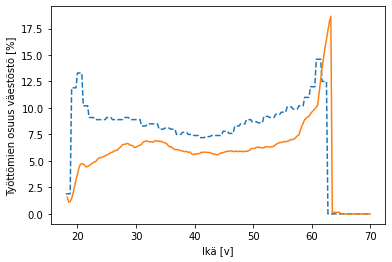

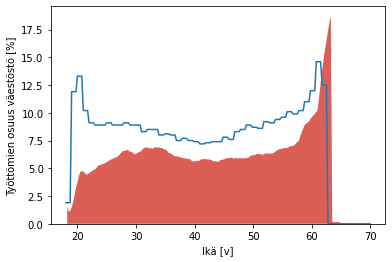

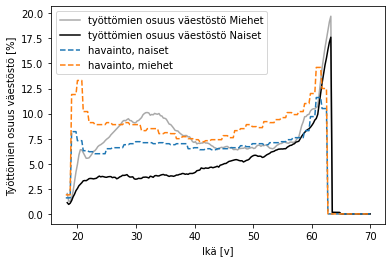

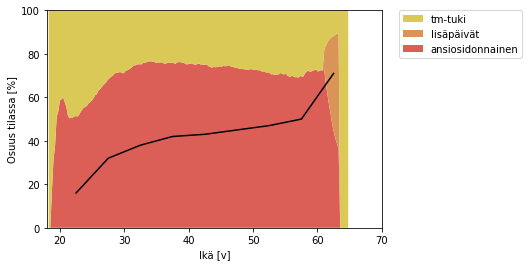

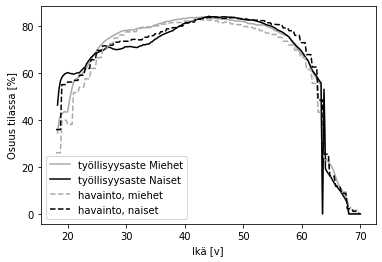

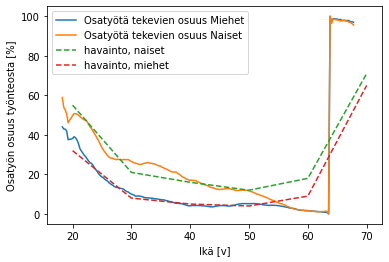

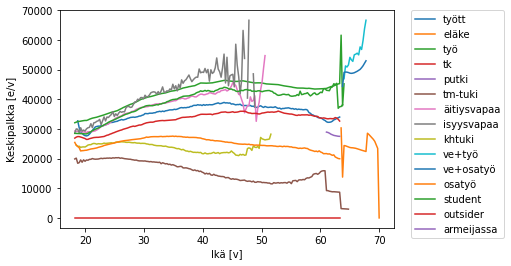

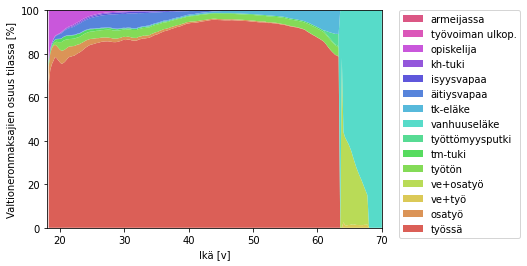

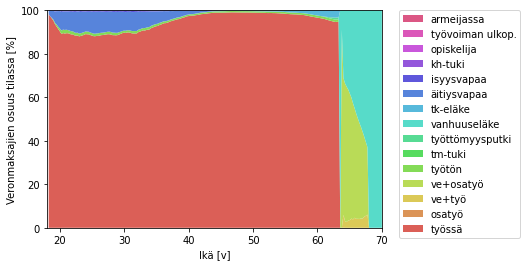

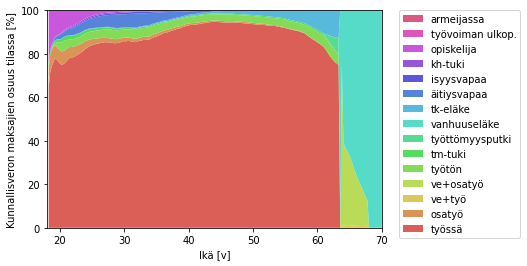

Valtionveron maksajien osuus
Etuudella olevat 5.60
Työssä 84.42
Eläkkeellä 12.96

Kunnallisveron maksajien osuus
Etuudella olevat 6.88
Työssä 68.42
Eläkkeellä 26.02

Veronmaksajien osuus
Etuudella olevat 6.67
Työssä 71.06
Eläkkeellä 23.86



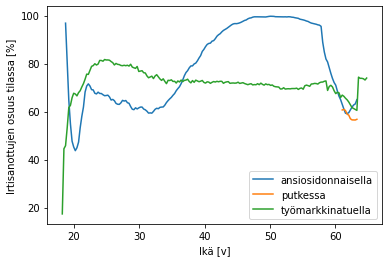

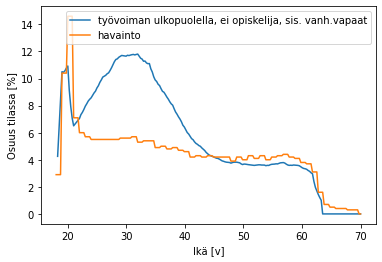

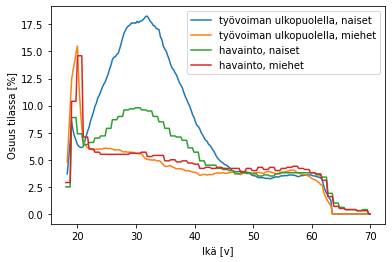

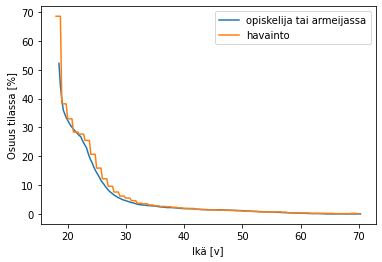

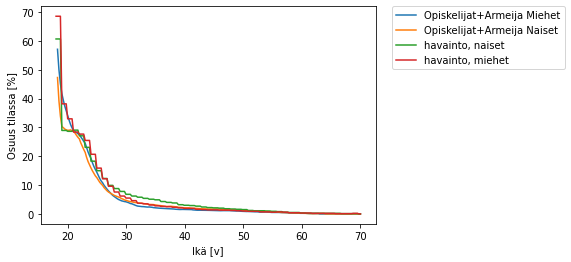

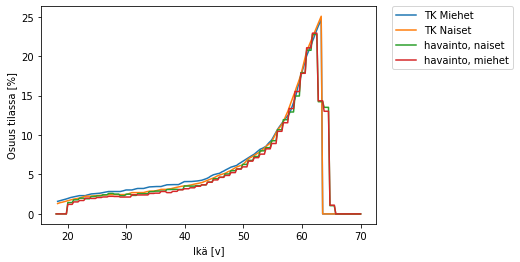

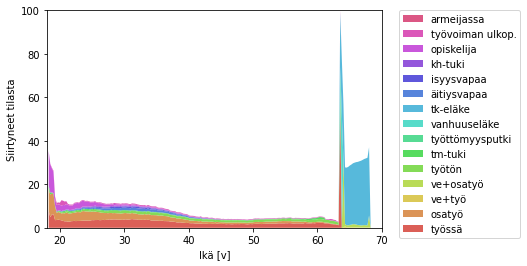

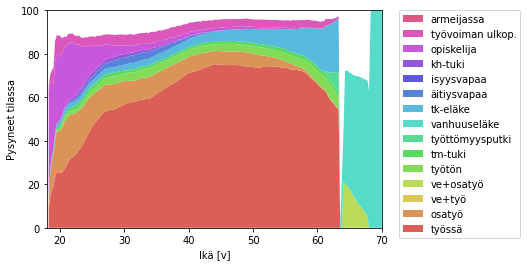

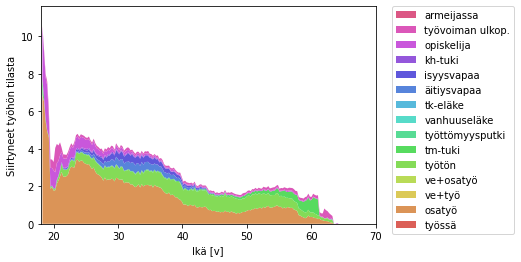

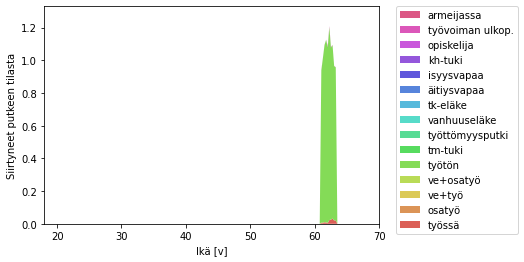

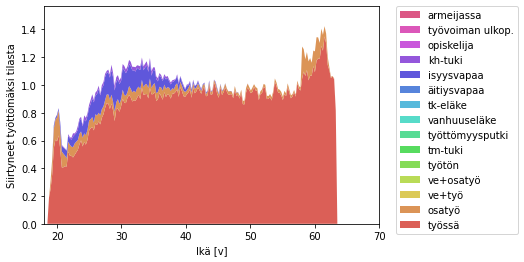

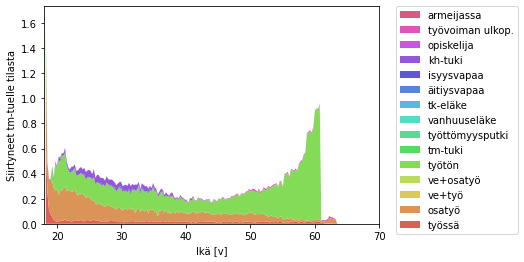

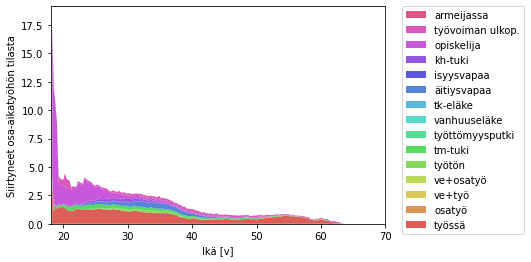

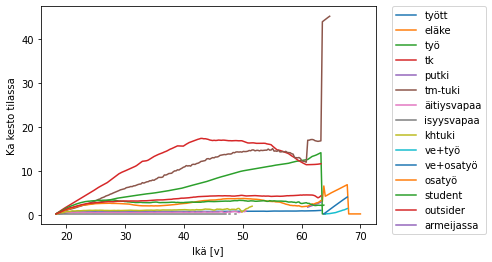

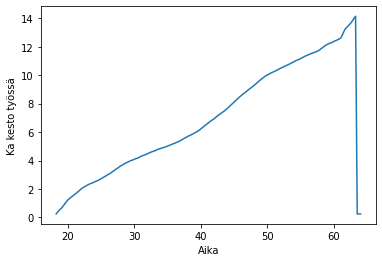

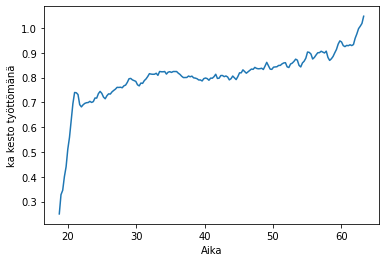

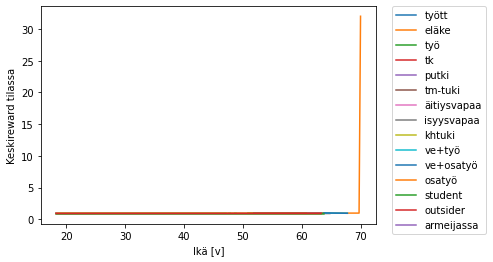

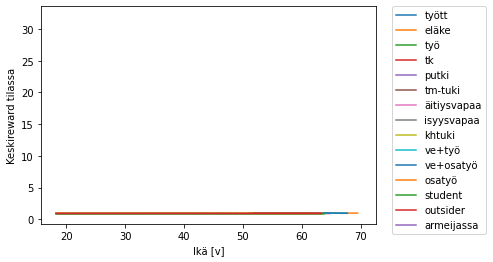

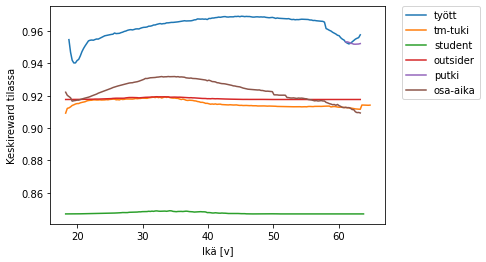

No handles with labels found to put in legend.


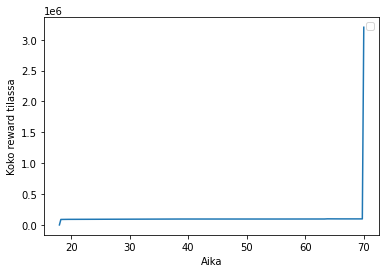

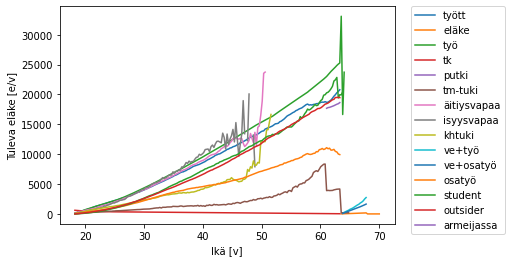

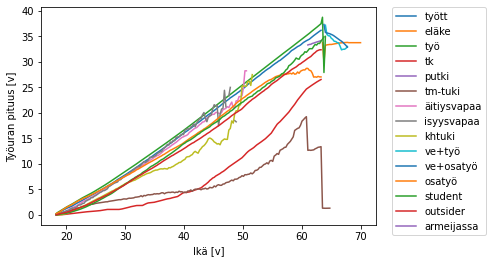

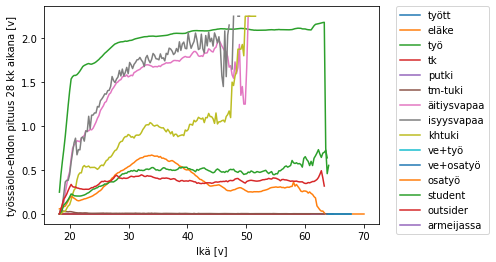

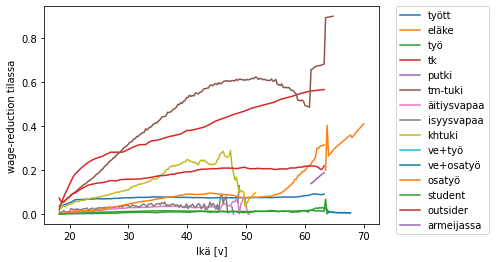

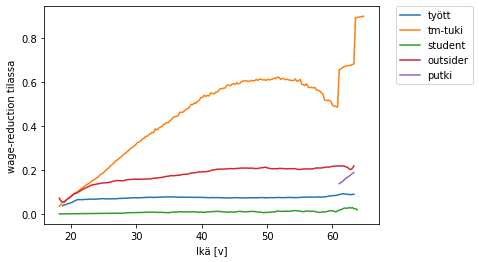

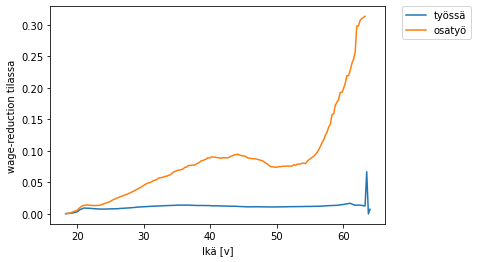

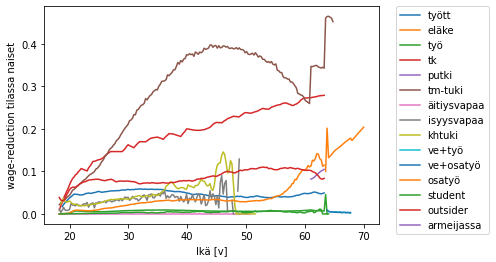

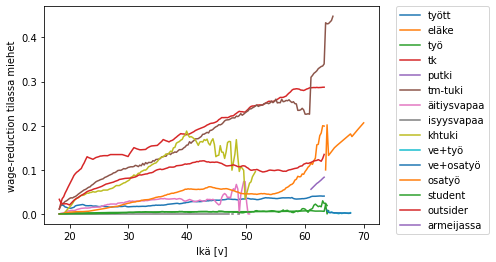

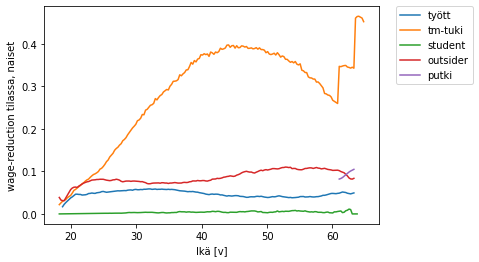

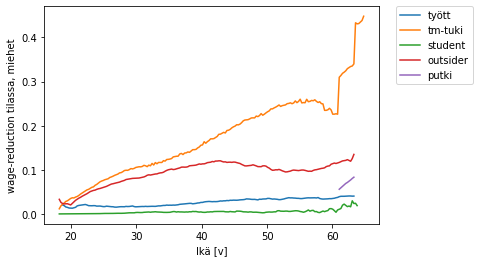

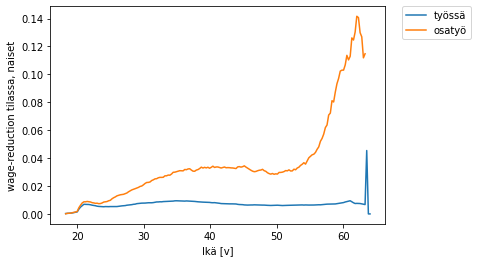

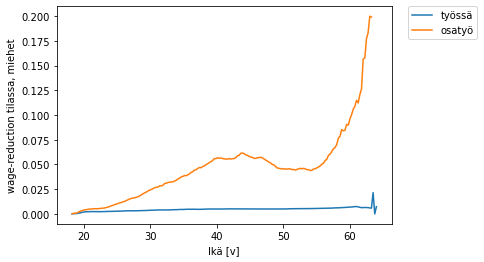

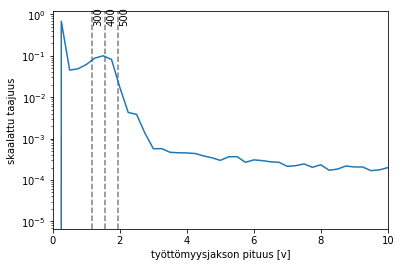

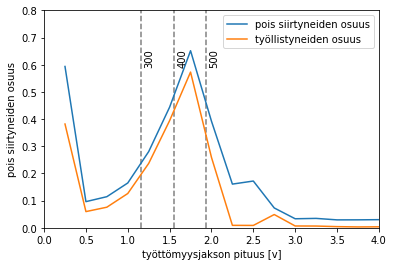

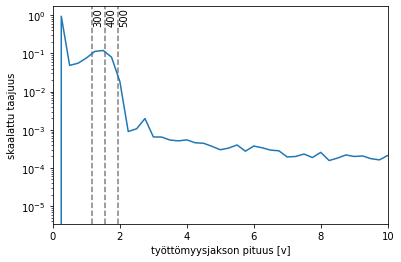

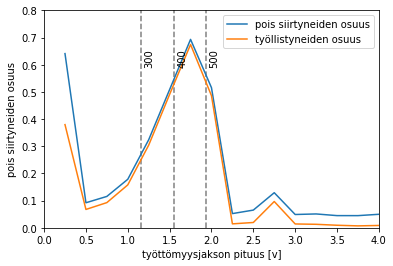

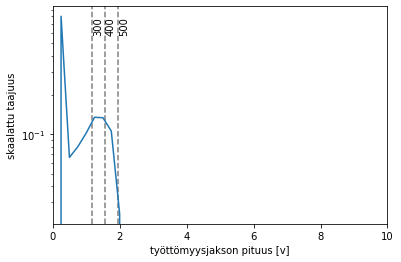

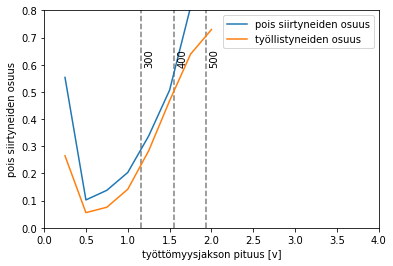

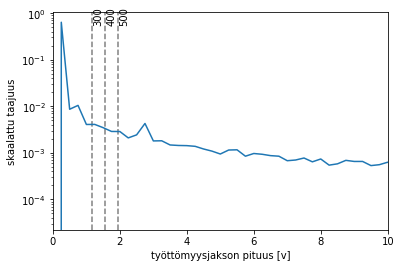

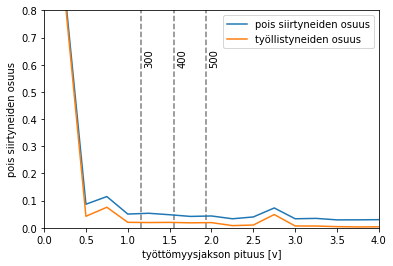

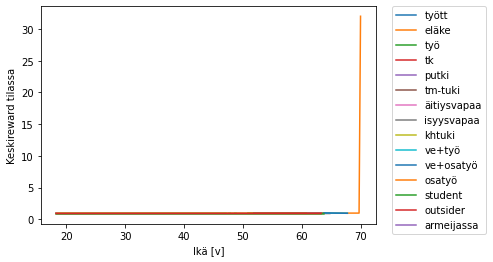

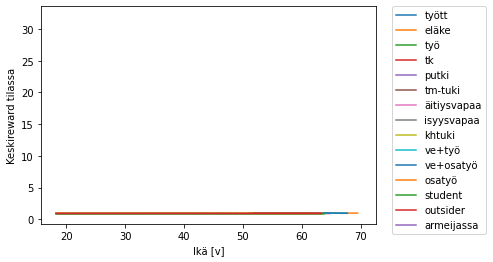

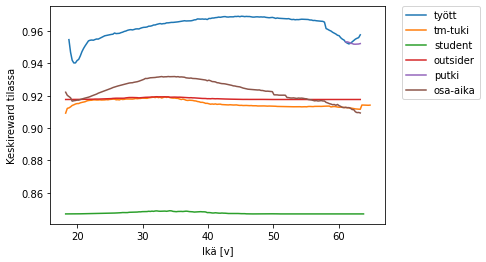

No handles with labels found to put in legend.


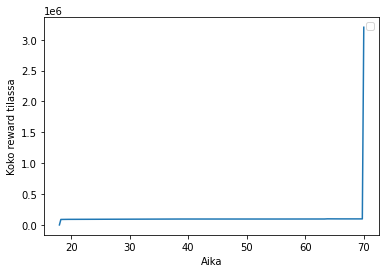

In [9]:
cc3.render()

In [10]:
cc1.env.toe_porrastus_kesto(1.75,3.0)

TypeError: toe_porrastus_kesto() missing 1 required positional argument: 'tyoura'